# Pyber Challenge

## Adding dependencies, Loading and Reading CSV files

In [46]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

## Merging DataFrames

In [47]:
# Combine the data into a single dataset
pyber_ride_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_ride_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Summary DataFrame

In [48]:
# Get total rides for each city type
total_rides_by_type = pyber_ride_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [49]:
# Get total drivers for each city type
total_drivers_by_type = pyber_ride_data_df.groupby("type").sum()["driver_count"]
total_drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [50]:
# Get total fares for each city type
total_fares_by_type = pyber_ride_data_df.groupby("type").sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [51]:
# Get average fares by city type
avg_fares_by_type = pyber_ride_data_df.groupby("type").mean()["fare"]
avg_fares_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [52]:
# Get average fares per drive by city type
avg_fares_per_driver_by_type = total_fares_by_type / total_drivers_by_type
avg_fares_per_driver_by_type

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [53]:
# Create a pyber summary dataframe
rides_by_type_df = pd.DataFrame({"Total Rides":total_rides_by_type,
                                "Total Drivers":total_drivers_by_type,
                                "Total Fares":total_fares_by_type,
                                "Avg Fare Per Ride":avg_fares_by_type,
                                "Avg Fare Per Driver":avg_fares_per_driver_by_type})
# Delete index name
rides_by_type_df.index.name = None
rides_by_type_df

,Total Rides,Total Drivers,Total Fares,Avg Fare Per Ride,Avg Fare Per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [54]:
# Format the columns

rides_by_type_df["Total Rides"] = rides_by_type_df["Total Rides"].map("{:,}".format)
rides_by_type_df["Total Drivers"] = rides_by_type_df["Total Drivers"].map("{:,}".format)
rides_by_type_df["Total Fares"] = rides_by_type_df["Total Fares"].map("${:,.2f}".format)
rides_by_type_df["Avg Fare Per Ride"] = rides_by_type_df["Avg Fare Per Ride"].map("${:,.2f}".format)
rides_by_type_df["Avg Fare Per Driver"] = rides_by_type_df["Avg Fare Per Driver"].map("${:,.2f}".format)

rides_by_type_df

,Total Rides,Total Drivers,Total Fares,Avg Fare Per Ride,Avg Fare Per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


# Deliverable 2: Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [55]:
# Read the merged dataframe
pyber_ride_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [56]:
# Create a new DF with sum of fares for each date where indices are city type and date
fare_type_df = pyber_ride_data_df.groupby(['type','date']).sum()["fare"]
fare_type_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [57]:
# Reset the index
fare_type_df = fare_type_df.reset_index()
fare_type_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [58]:
# Create a pivot table with date as the index
fare_type_pivot = fare_type_df.pivot(index="date", columns="type", values="fare")
fare_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [59]:
# Create a new dataframe from the pivot, using loc on the given dates 1/1/2019 - 4/29/2019
fare_loc_jan_apr_df = fare_type_pivot.loc['2019-01-01': '2019-04-29']
fare_loc_jan_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [60]:
# Set the date index to datetime datatype
fare_loc_jan_apr_df.index = pd.to_datetime(fare_loc_jan_apr_df.index)
# Check that the datatype for the index is datetime using df.info()
fare_loc_jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [61]:
# Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week_df = fare_loc_jan_apr_df.resample("W").sum()
fares_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<function matplotlib.pyplot.show(close=None, block=None)>

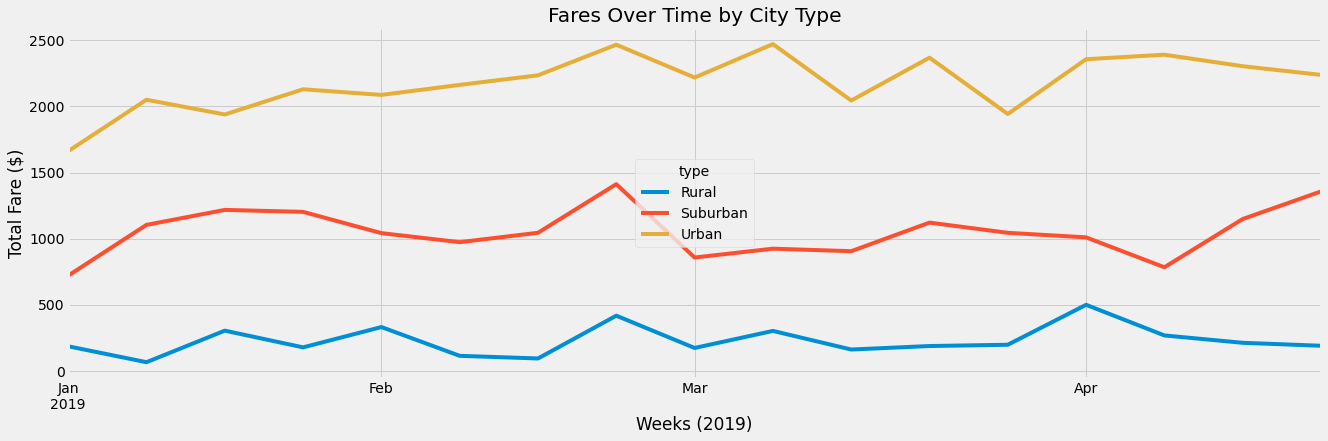

In [62]:
# Plot using df.plot () function
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax = fares_by_week_df.plot(figsize=(20,6))
ax.set_title("Fares Over Time by City Type")
ax.set_xlabel("Weeks (2019)")
ax.set_ylabel("Total Fare ($)")
plt.savefig("Resources/Fare_by_Week.png")
plt.show